In [1]:
import pandas as pd
import numpy as np



# RandomForst Model

In [3]:
data = pd.read_csv('/content/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[['Brands','VEHICLECLASS','TRANSMISSION','FUELTYPE']] = data[['Brands','VEHICLECLASS','TRANSMISSION','FUELTYPE']].apply(le.fit_transform)


In [6]:
data.drop('MODELYEAR',axis = 1, inplace = True)

In [7]:
from sklearn.model_selection import train_test_split

x = data.drop('CO2EMISSIONS', axis=1).values
y = data['CO2EMISSIONS'].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

R_F_model = RandomForestRegressor()

R_F_model.fit(x_train,y_train)

y_pred = R_F_model.predict(x_test)

In [15]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2_score = metrics.r2_score(y_test,y_pred)

print(" MAE on R_f model = ",MAE)
print(" MAPE on R_f model = ",MAPE)
print(" MSE on R_f model = ",MSE)
print(" RMSE on R_f model = ",RMSE)
print(" R2_score on R_f model = ",R2_score)

 MAE on R_f model =  2.1028504672897217
 MAPE on R_f model =  0.008882173904455603
 MSE on R_f model =  85.37644532710279
 RMSE on R_f model =  9.239937517489109
 R2_score on R_f model =  0.9793524617482131


In [18]:
y_mean = y.mean()

RMSE/y_mean

0.036061293256524886

([<matplotlib.axis.YTick at 0x7df4dcf838b0>,
 [Text(0, 0, 'Brands'),
  Text(0, 1, 'TRANSMISSION'),
  Text(0, 2, 'VEHICLECLASS'),
  Text(0, 3, 'FUELCONSUMPTION_HWY'),
  Text(0, 4, 'CYLINDERS'),
  Text(0, 5, 'FUELTYPE'),
  Text(0, 6, 'FUELCONSUMPTION_CITY'),
  Text(0, 7, 'ENGINESIZE'),
  Text(0, 8, 'FUELCONSUMPTION_COMB_MPG'),
  Text(0, 9, 'FUELCONSUMPTION_COMB')])

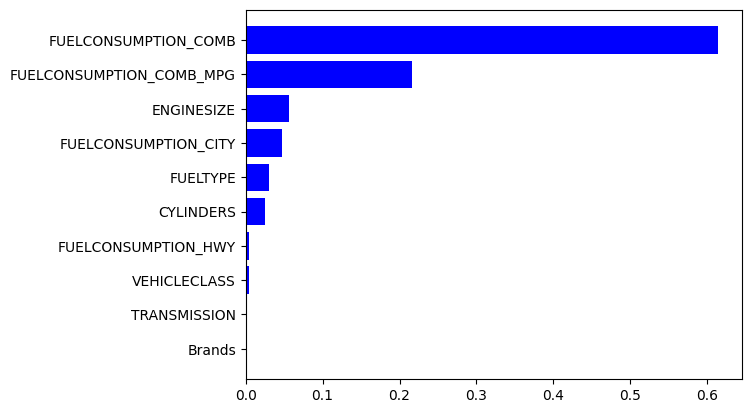

In [19]:
import matplotlib.pyplot as plt
columns_names = data.drop('CO2EMISSIONS',axis=1).columns.tolist()

importance = R_F_model.feature_importances_

indices = np.argsort(importance)

plt.barh(range(len(indices)),importance[indices], color='b')

plt.yticks(range(len(indices)), [columns_names[i] for i in indices])

# Cross validation

In [25]:
from sklearn.model_selection import KFold, cross_val_score

R_F_model = RandomForestRegressor()

cv_conf = KFold(n_splits=8, random_state=1 , shuffle=True)

scores = cross_val_score(R_F_model, x, y, cv =cv_conf , scoring='neg_root_mean_squared_error')

print(np.absolute(scores))
print(' Final score = ', np.mean(np.absolute(scores)))

[ 3.42238352  9.22909671 10.07530745  2.09351864  2.12969287 12.92608347
  3.58028772  3.04241421]
 Final score =  5.8123480733371835


# Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

Param_ranges = {
    'n_estimators': list(range(50,60)),
    'max_depth': [5,10,15,20,22,None],
    'min_samples_split':[2,3,4,5]
}

R_F_model = RandomForestRegressor()

g_search = GridSearchCV(estimator=R_F_model, param_grid =Param_ranges, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=3  )

g_search.fit(x,y)

In [37]:
print('Best parameters',g_search.best_params_)
print('Best score',np.absolute(g_search.best_score_))

Best parameters {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 55}
Best score 8.355844013625779
